In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#Importing Files 
data = pd.read_csv('EEG_Eye_State_Classification.csv')
data.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0


In [4]:
#Check and remove any outliers from the data. 
from pandas import read_csv
from numpy import mean
from numpy import std
from numpy import delete
from numpy import savetxt
values = data.values
# step over each EEG column
for i in range(values.shape[1] - 1):
	# calculate column mean and standard deviation
	data_mean, data_std = mean(values[:,i]), std(values[:,i])
	# define outlier bounds
	cut_off = data_std * 4
	lower, upper = data_mean - cut_off, data_mean + cut_off
	# remove too small
	too_small = [j for j in range(values.shape[0]) if values[j,i] < lower]
	values = delete(values, too_small, 0)
	print('>deleted %d rows' % len(too_small))
	# remove too large
	too_large = [j for j in range(values.shape[0]) if values[j,i] > upper]
	values = delete(values, too_large, 0)
	print('>deleted %d rows' % len(too_large))
# save the results to a new file
savetxt('EEG_Eye_State_no_outliers.csv', values, delimiter=',')

>deleted 0 rows
>deleted 1 rows
>deleted 2 rows
>deleted 1 rows
>deleted 0 rows
>deleted 142 rows
>deleted 0 rows
>deleted 48 rows
>deleted 0 rows
>deleted 153 rows
>deleted 0 rows
>deleted 43 rows
>deleted 0 rows
>deleted 0 rows
>deleted 0 rows
>deleted 15 rows
>deleted 0 rows
>deleted 5 rows
>deleted 10 rows
>deleted 0 rows
>deleted 21 rows
>deleted 53 rows
>deleted 0 rows
>deleted 12 rows
>deleted 58 rows
>deleted 53 rows
>deleted 0 rows
>deleted 59 rows


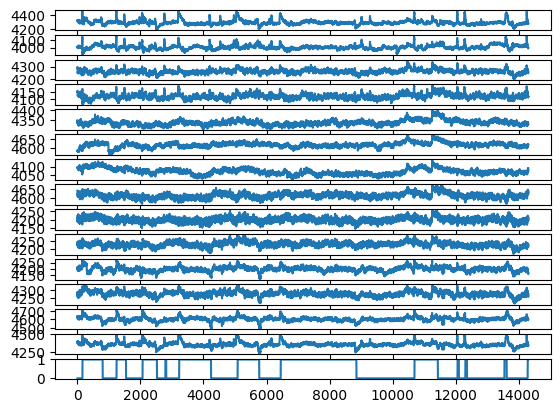

In [5]:
# visualize dataset without outliers
from pandas import read_csv
from matplotlib import pyplot
# load the dataset
data = read_csv('EEG_Eye_State_no_outliers.csv', header=None)
# retrieve data as numpy array
values = data.values
# create a subplot for each time series
pyplot.figure()
for i in range(values.shape[1]):
	pyplot.subplot(values.shape[1], 1, i+1)
	pyplot.plot(values[:, i])
pyplot.show()

In [6]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0.0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0.0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0.0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0.0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0.0


<Axes: xlabel='14'>

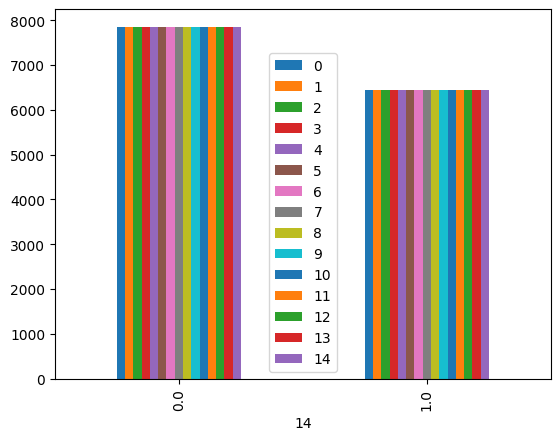

In [7]:
#Barplots 
res = data.groupby([data.iloc[:,-1]]).count()
res.plot(kind='bar')

In [10]:
#Split data into X and y for train, test and split. 
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
print(X) 
print(y)

            0        1        2        3        4        5        6        7   \
0      4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
1      4324.62  4004.62  4293.85  4148.72  4342.05  4586.67  4097.44  4638.97   
2      4327.69  4006.67  4295.38  4156.41  4336.92  4583.59  4096.92  4630.26   
3      4328.72  4011.79  4296.41  4155.90  4343.59  4582.56  4097.44  4630.77   
4      4326.15  4011.79  4292.31  4151.28  4347.69  4586.67  4095.90  4627.69   
...        ...      ...      ...      ...      ...      ...      ...      ...   
14299  4281.03  3990.26  4245.64  4116.92  4333.85  4614.36  4074.87  4625.64   
14300  4276.92  3991.79  4245.13  4110.77  4332.82  4615.38  4073.33  4621.54   
14301  4277.44  3990.77  4246.67  4113.85  4333.33  4615.38  4072.82  4623.59   
14302  4284.62  3991.79  4251.28  4122.05  4334.36  4616.41  4080.51  4628.72   
14303  4287.69  3997.44  4260.00  4121.03  4333.33  4616.41  4088.72  4638.46   

            8        9     

In [11]:
#Find the optimal number of K using elbow method. 
from sklearn.cluster import KMeans 
from scipy.spatial.distance import cdist
import math
distortions = []
K = range(1,10)
for k in K: 
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(X)
    distortions.append(sum(np.min(cdist(X,kmeans_model.cluster_centers_,"euclidean"),axis=1))/X.shape[0])

c:\Users\faisa\anaconda3\envs\ai\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\faisa\anaconda3\envs\ai\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\faisa\anaconda3\envs\ai\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\faisa\anaconda3\envs\ai\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\faisa\anaconda3

range(1, 10)
42.89982618176722


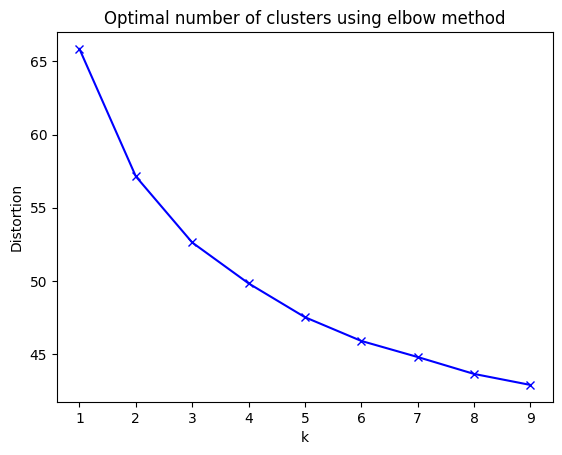

In [12]:
import matplotlib.pyplot as plt
#Plot distortions againt K value
print(K)
# checking for min of K value
print(np.min(distortions))
#Plotting for change in K value
plt.plot(K,distortions,'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Optimal number of clusters using elbow method')
plt.show() 

In [13]:
#Train Test and Split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [14]:
#Import KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
# metric = minkowski and p=2 is Euclidean Distance
# metric = minkowski and p=1 is Manhattan Distance
classifier = KNeighborsClassifier(n_neighbors=2, metric="minkowski",p=2)
classifier.fit(X_train, y_train) #Fit the data

import joblib

# Assuming you have trained the KNN classifier and stored it in the 'classifier' variable

# Save the model to a file
joblib.dump(classifier, 'knn_model.pkl')

['knn_model.pkl']

In [16]:
import joblib
from PIL import Image
import numpy as np
from sklearn.neighbors import KNeighborsClassifier


# Load the saved model from a file
classifier = joblib.load('knn_model.pkl')

# Load the trained classifier
# classifier = KNeighborsClassifier()
# classifier = classifier.load('knn_model.pkl')  # Assuming you have saved the model as 'knn_model.pkl'

# Load and preprocess the test image
image = Image.open('test.jpg')  # Replace 'test_image.jpg' with the path to your actual test image
image = image.resize((28, 28))  # Resize the image to match the input size used during training
image = image.convert('L')  # Convert the image to grayscale
image = np.array(image).flatten()  # Flatten the image into a 1D array

# Make prediction
predicted_label = classifier.predict([image])

print("Predicted label:", predicted_label)

FileNotFoundError: [Errno 2] No such file or directory: 'knn2_model.pkl'